<a href="https://colab.research.google.com/github/Joboreh97/TinyML_Projects/blob/main/EX6_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

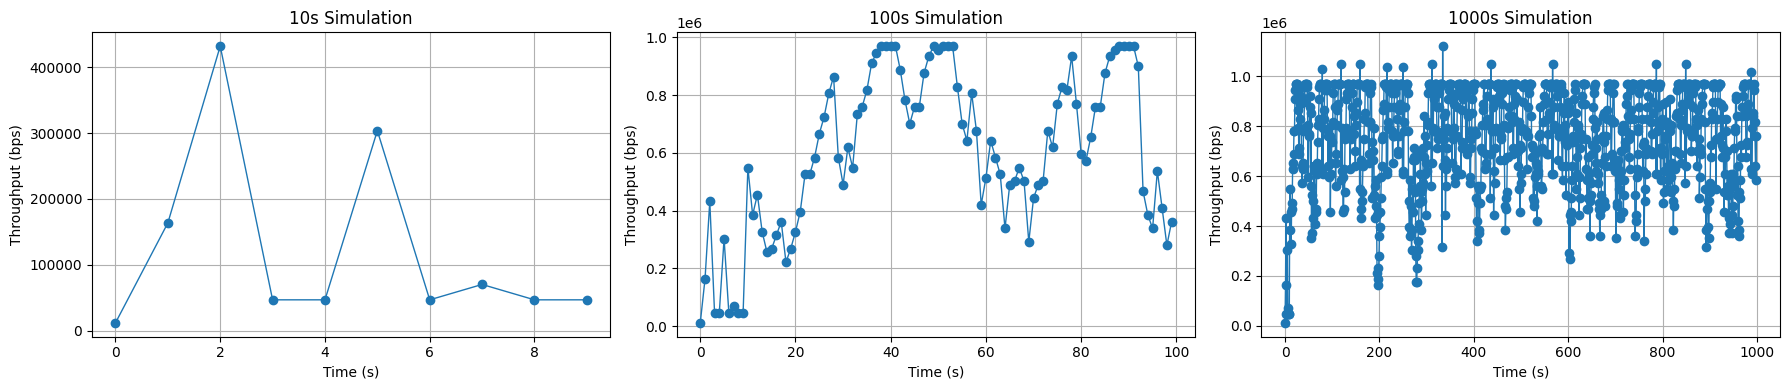

In [1]:
import json
import matplotlib.pyplot as plt

# Helper function to extract throughput per 1s interval
def compute_throughput(filepath, duration):
    with open(filepath, 'r') as f:
        data = json.load(f)

    sim_key = list(data.keys())[0]
    vector = data[sim_key]["vectors"][0]
    times = vector["time"]
    values = vector["value"]  # bytes

    throughput_bps = []
    time_bins = []

    for start in range(0, duration):
        end = start + 1
        bits = sum(v * 8 for t, v in zip(times, values) if start <= t < end)
        throughput_bps.append(bits)
        time_bins.append(start)

    return time_bins, throughput_bps

# File paths — upload these to Colab beforehand
files = {
    "10s": ("/content/10s.json", 10),
    "100s": ("/content/100s.json", 100),
    "1000s": ("/content/1000s.json", 1000),
}

# Plot all 3 graphs
plt.figure(figsize=(18, 4))

for i, (label, (path, duration)) in enumerate(files.items()):
    x, y = compute_throughput(path, duration)
    plt.subplot(1, 3, i + 1)
    plt.plot(x, y, marker='o', linewidth=1)
    plt.title(f"{label} Simulation")
    plt.xlabel("Time (s)")
    plt.ylabel("Throughput (bps)")
    plt.grid(True)

plt.tight_layout()
plt.show()


2. Effect of Repeating 10s Simulations with Different Seeds
Repeating the 10-second simulation 10 times with different random seeds will show variability in the average application layer throughput results. This variability occurs because each run uses a different random seed affecting traffic patterns, delays, and packet losses. The average throughput over these runs gives a better estimate of the expected performance, while the spread of results indicates the uncertainty or noise in the simulation.

3. Understanding Confidence Intervals
A confidence interval (CI) provides a range of values within which the true mean throughput is likely to lie with a certain level of confidence (typically 95%). It quantifies the uncertainty of the simulation estimate due to the randomness in the simulation runs. Mathematically, the 95% confidence interval for the mean is often computed as:

x
ˉ
±
t
α
/
2
,
n
−
1
×
s
n
x
ˉ
 ±t
α/2,n−1
 ×
n

s

where
x
ˉ
x
ˉ
  is the sample mean throughput,
s
s is the sample standard deviation,
n
n is the number of simulation runs, and
t
α
/
2
,
n
−
1
t
α/2,n−1
  is the t-distribution critical value

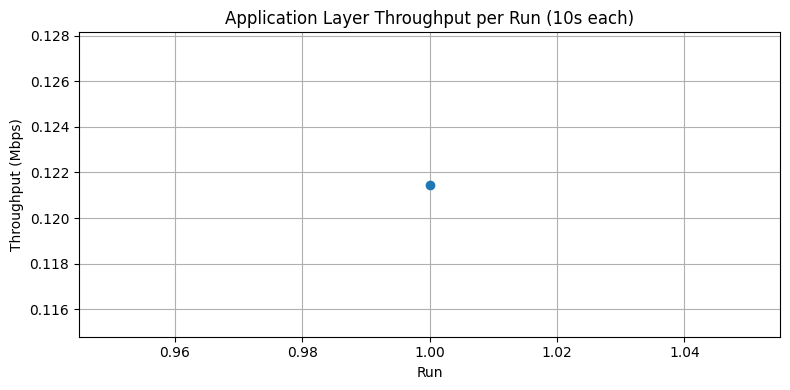

Average throughput over 10 runs: 0.121 Mbps


In [2]:
import json
import matplotlib.pyplot as plt

# Load the JSON file
with open('/content/10s_repeat_10.json', 'r') as f:
    data = json.load(f)

throughputs_mbps = []

for sim_key in data:
    vectors = data[sim_key]["vectors"]
    # Find the vector for packetBytes received at the server
    for vector in vectors:
        if vector["module"] == "TcpNetwork.server.app[0]" and "packetReceived" in vector["name"]:
            # Sum all bytes received in this run
            total_bytes = sum(vector["value"])
            # Convert to bits
            total_bits = total_bytes * 8
            # Throughput in Mbps (divide by 10s, then by 1e6)
            throughput_mbps = total_bits / 10 / 1e6
            throughputs_mbps.append(throughput_mbps)
            break

# Plot throughput for each run
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(throughputs_mbps)+1), throughputs_mbps, marker='o')
plt.xlabel('Run')
plt.ylabel('Throughput (Mbps)')
plt.title('Application Layer Throughput per Run (10s each)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print average throughput
avg_throughput = sum(throughputs_mbps) / len(throughputs_mbps)
print(f"Average throughput over 10 runs: {avg_throughput:.3f} Mbps")


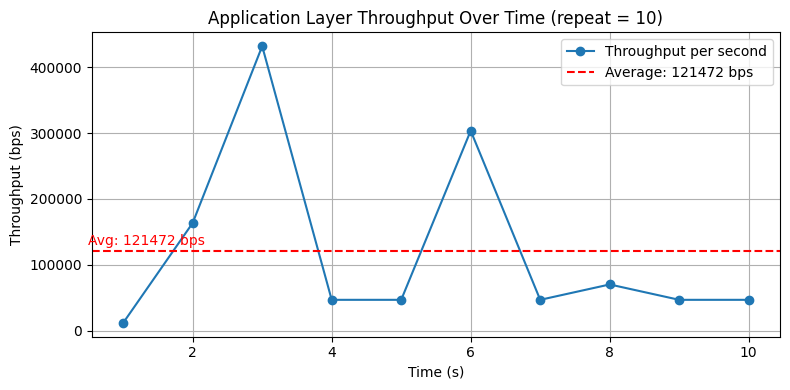

In [9]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/10s_repeat_10.json', 'r') as f:
    data = json.load(f)

# Select a run to plot (e.g., the first one)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Compute throughput per second (bps)
duration = 10  # seconds
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    # Convert to bits per second
    throughput = (total_bytes * 8)  # bits per second over 1 second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 10s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (repeat = 10)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(0.5, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


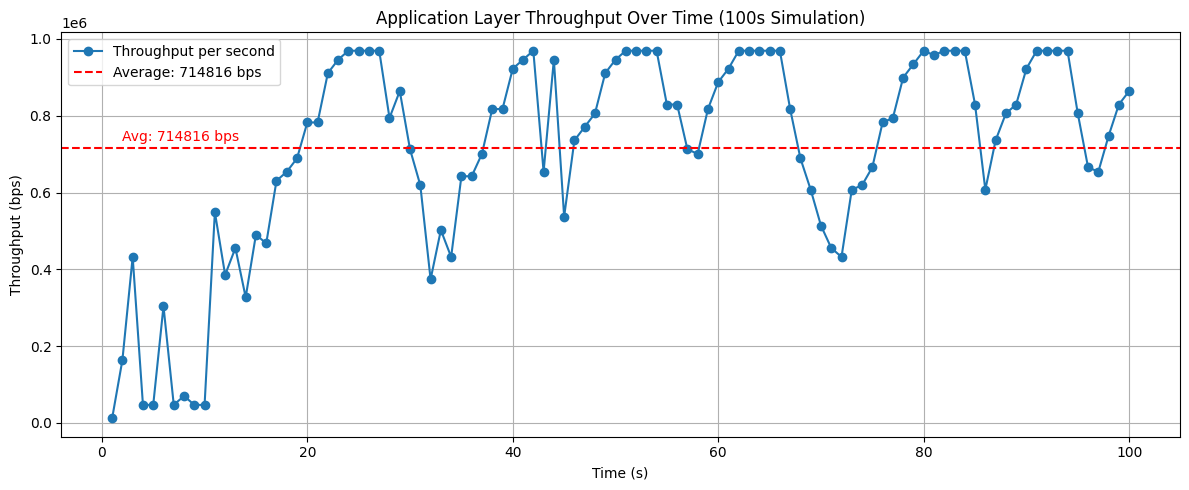

In [11]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/100s_repeat_0.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 100 seconds
duration = 100
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 100s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(12, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (100s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(2, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


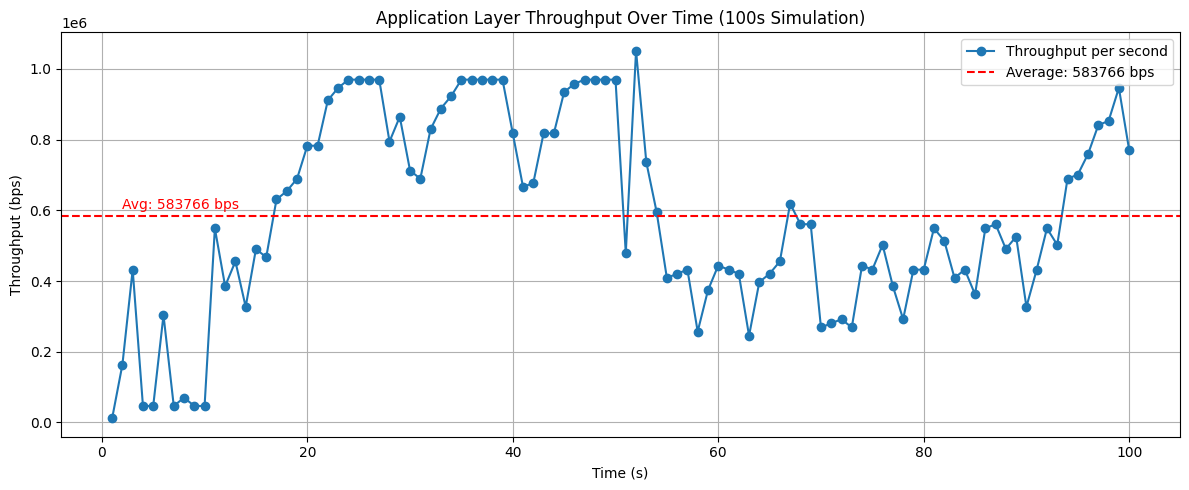

In [12]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/100s_repeat_1.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 100 seconds
duration = 100
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 100s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(12, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (100s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(2, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


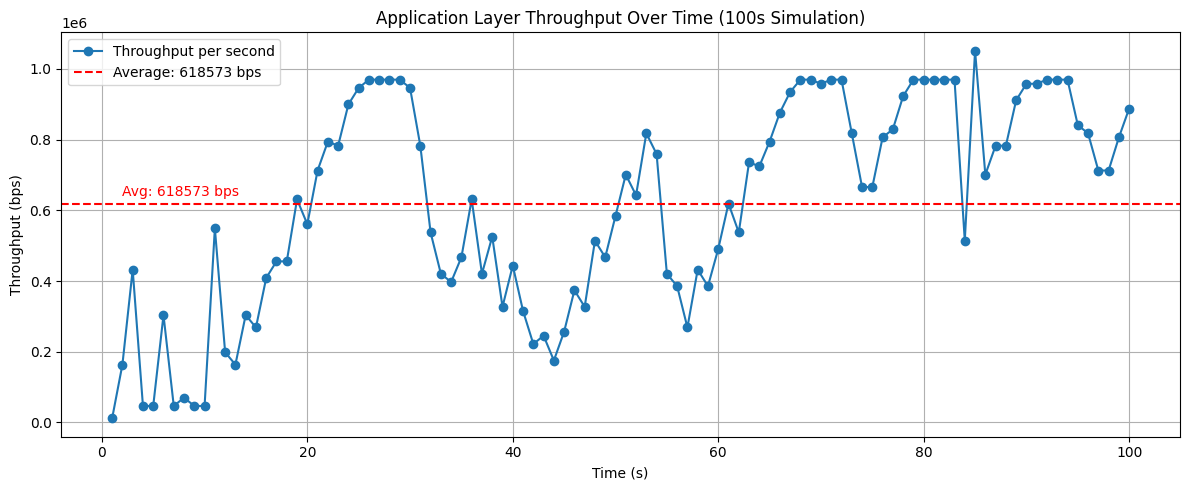

In [13]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/100s_repeat_2.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 100 seconds
duration = 100
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 100s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(12, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (100s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(2, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


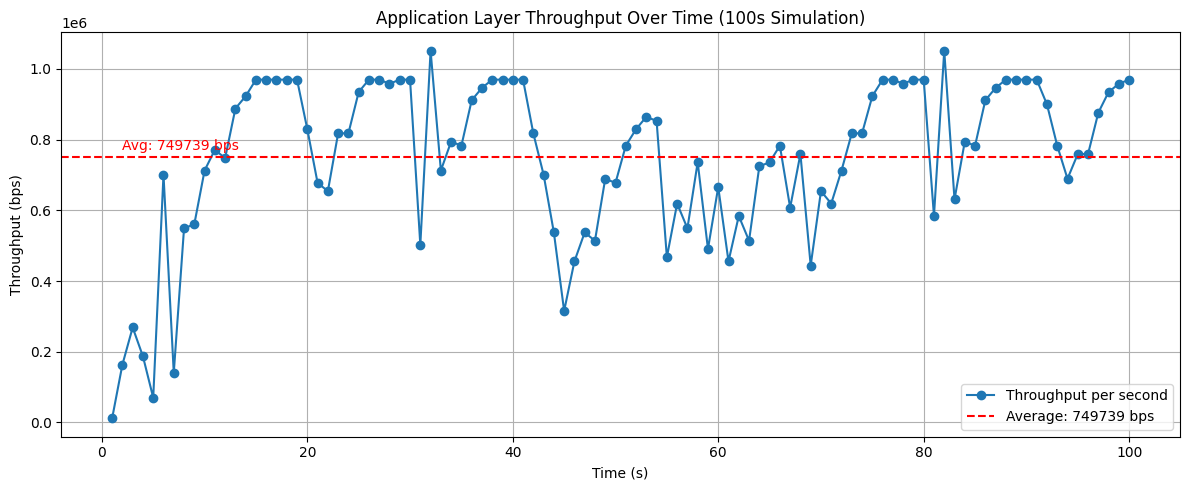

In [14]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/100s_repeat_3.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 100 seconds
duration = 100
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 100s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(12, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (100s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(2, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


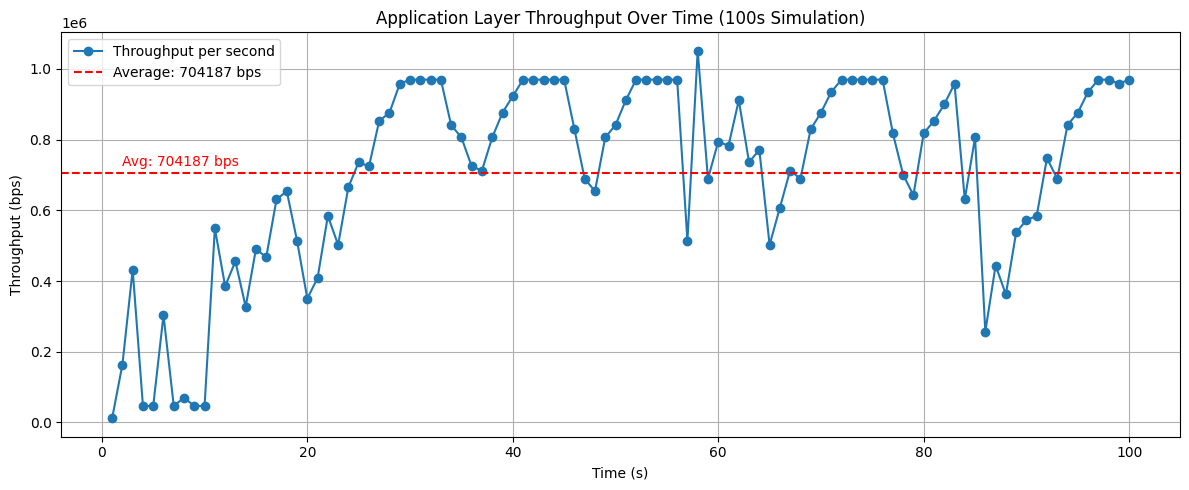

In [15]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/100s_repeat_4.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 100 seconds
duration = 100
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 100s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(12, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (100s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(2, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


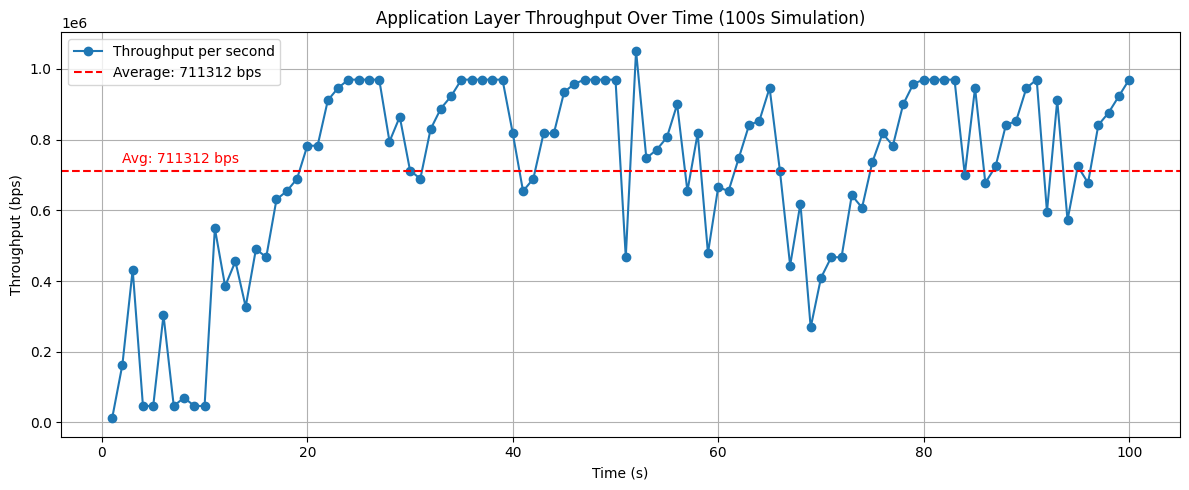

In [16]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/100s_repeat_5.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 100 seconds
duration = 100
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 100s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(12, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (100s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(2, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


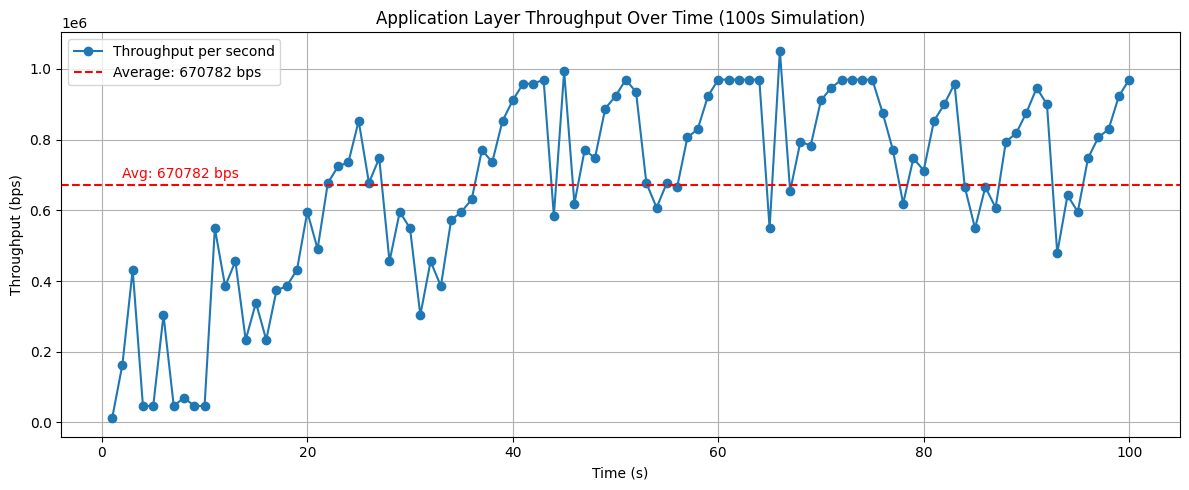

In [17]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/100s_repeat_6.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 100 seconds
duration = 100
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 100s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(12, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (100s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(2, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


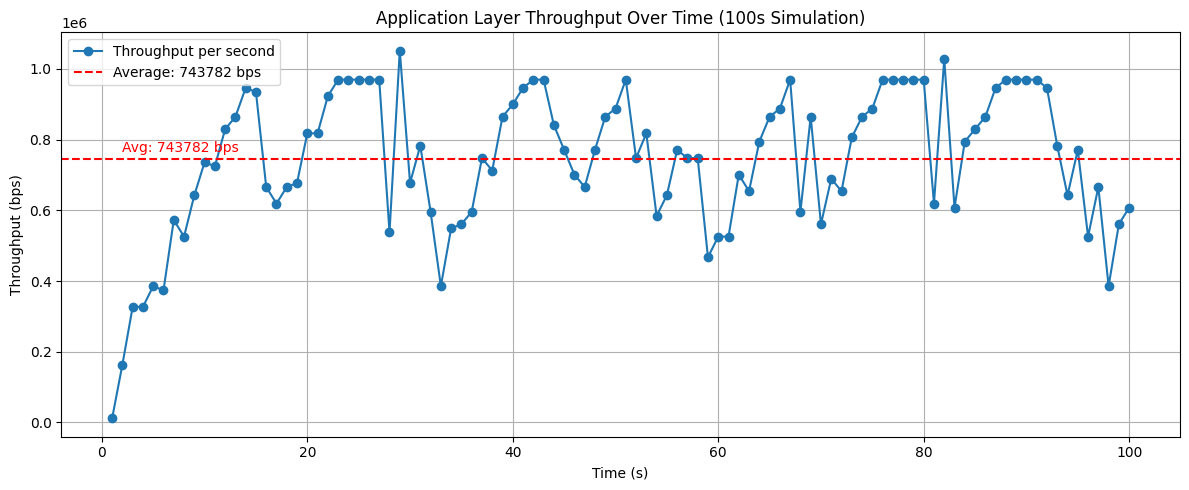

In [18]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/100s_repeat_7.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 100 seconds
duration = 100
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 100s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(12, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (100s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(2, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


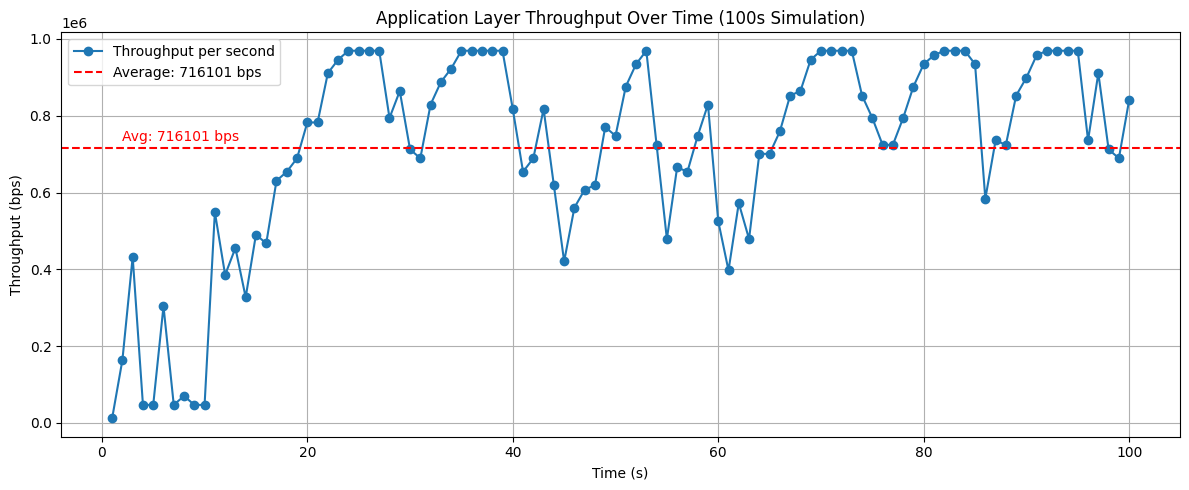

In [19]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/100s_repeat_8.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 100 seconds
duration = 100
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 100s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(12, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (100s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(2, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


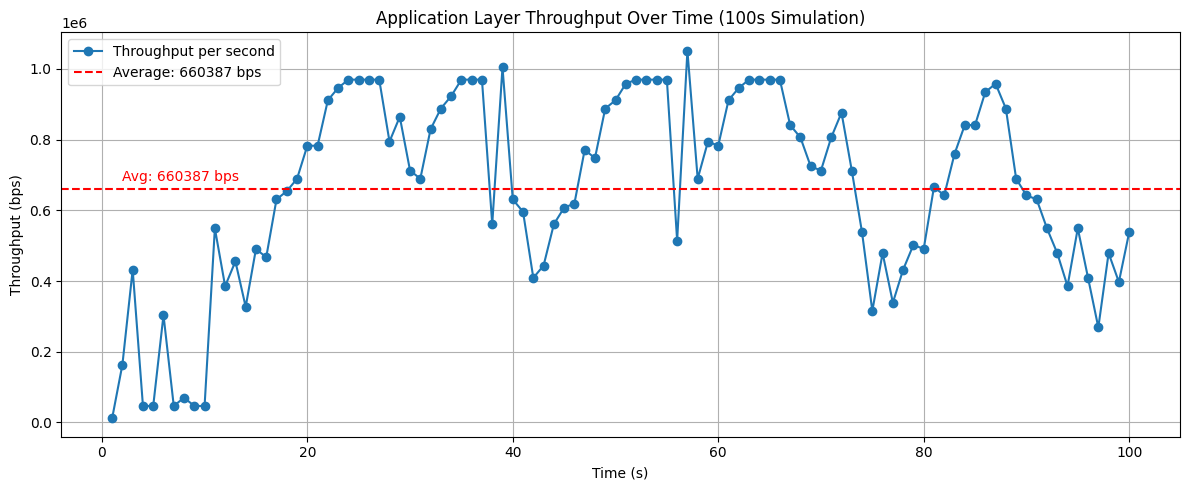

In [20]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/100s_repeat_9.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 100 seconds
duration = 100
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 100s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(12, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (100s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(2, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


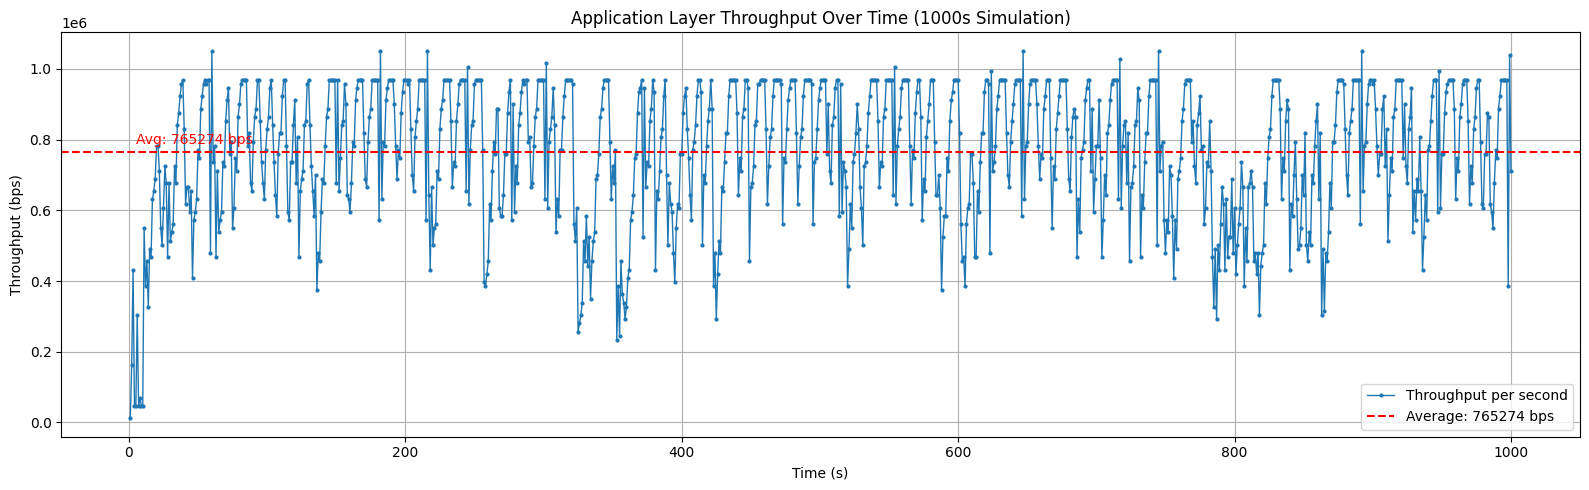

In [21]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/1000s_repeat_0.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 1000 seconds
duration = 1000
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 1000s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(16, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', markersize=2, linewidth=1, label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (1000s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(5, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


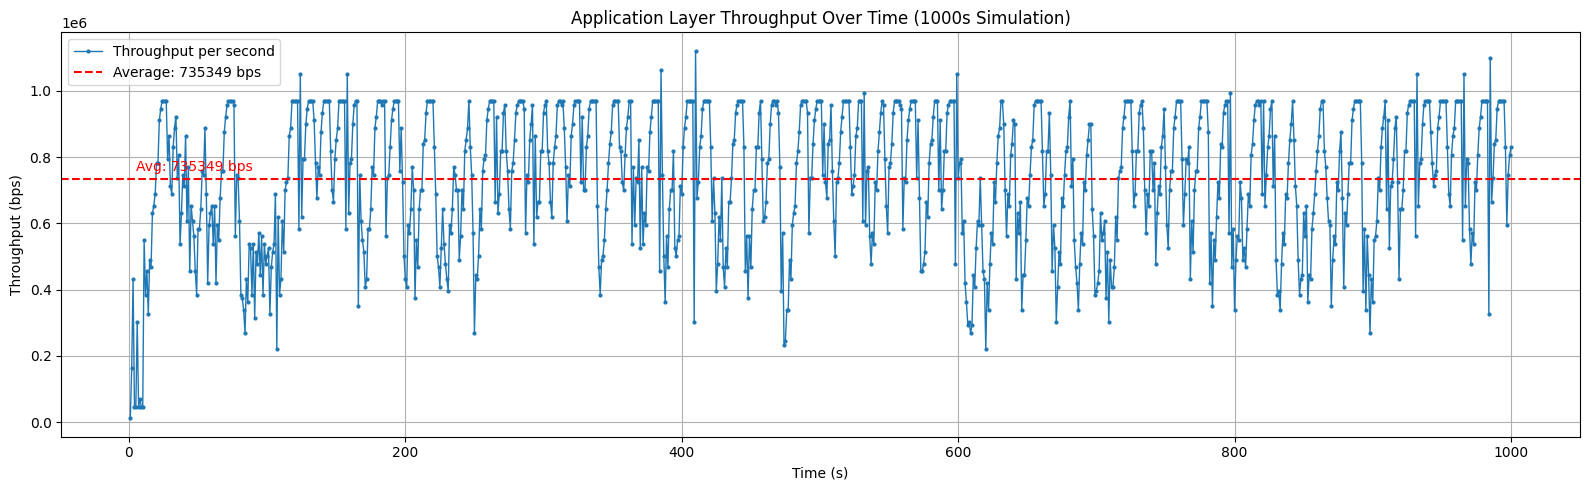

In [22]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/1000s_repeat_1.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 1000 seconds
duration = 1000
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 1000s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(16, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', markersize=2, linewidth=1, label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (1000s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(5, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


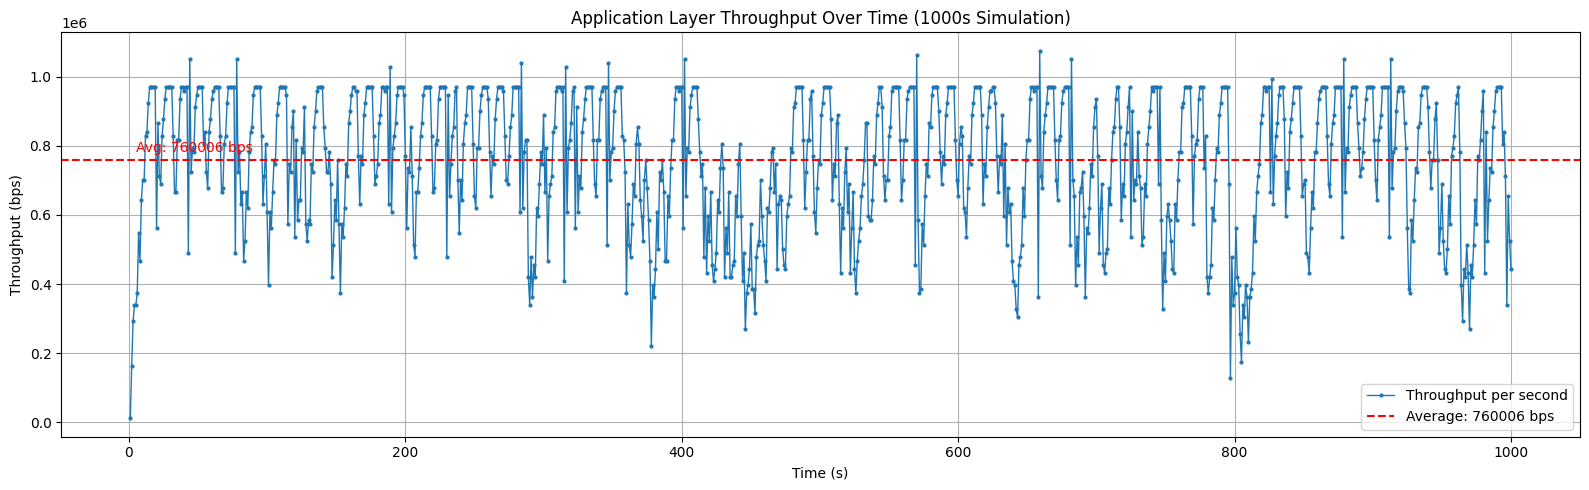

In [23]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/1000s_repeat_2.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 1000 seconds
duration = 1000
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 1000s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(16, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', markersize=2, linewidth=1, label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (1000s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(5, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


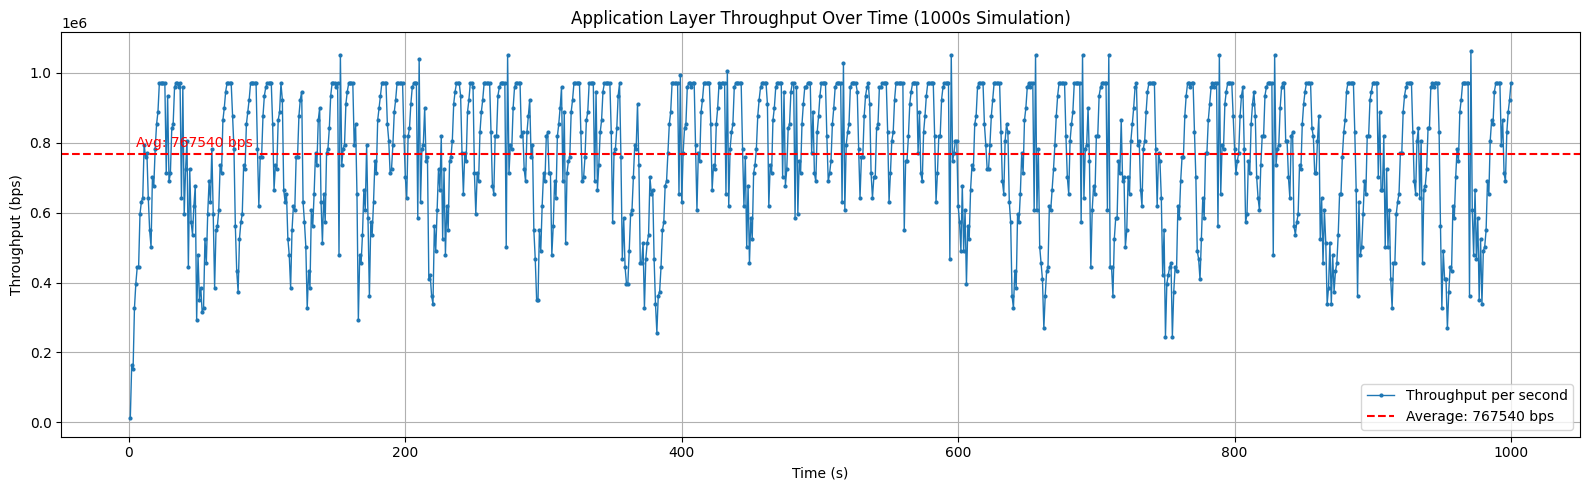

In [24]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/1000s_repeat_3.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 1000 seconds
duration = 1000
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 1000s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(16, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', markersize=2, linewidth=1, label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (1000s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(5, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


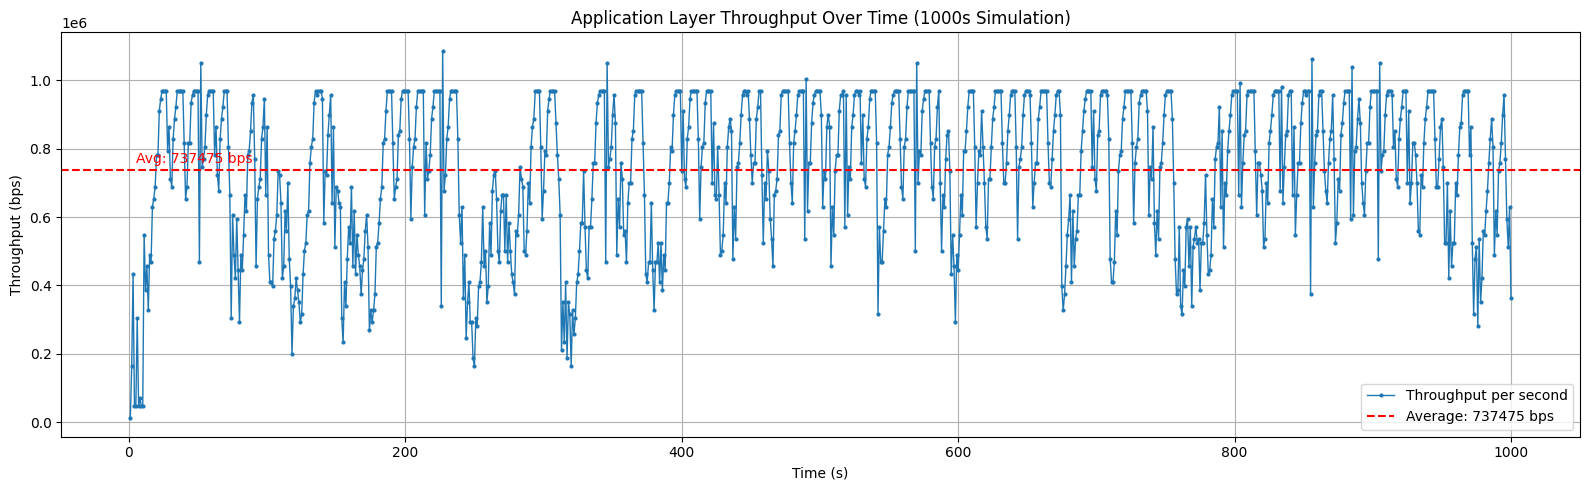

In [25]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/1000s_repeat_4.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 1000 seconds
duration = 1000
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 1000s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(16, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', markersize=2, linewidth=1, label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (1000s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(5, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


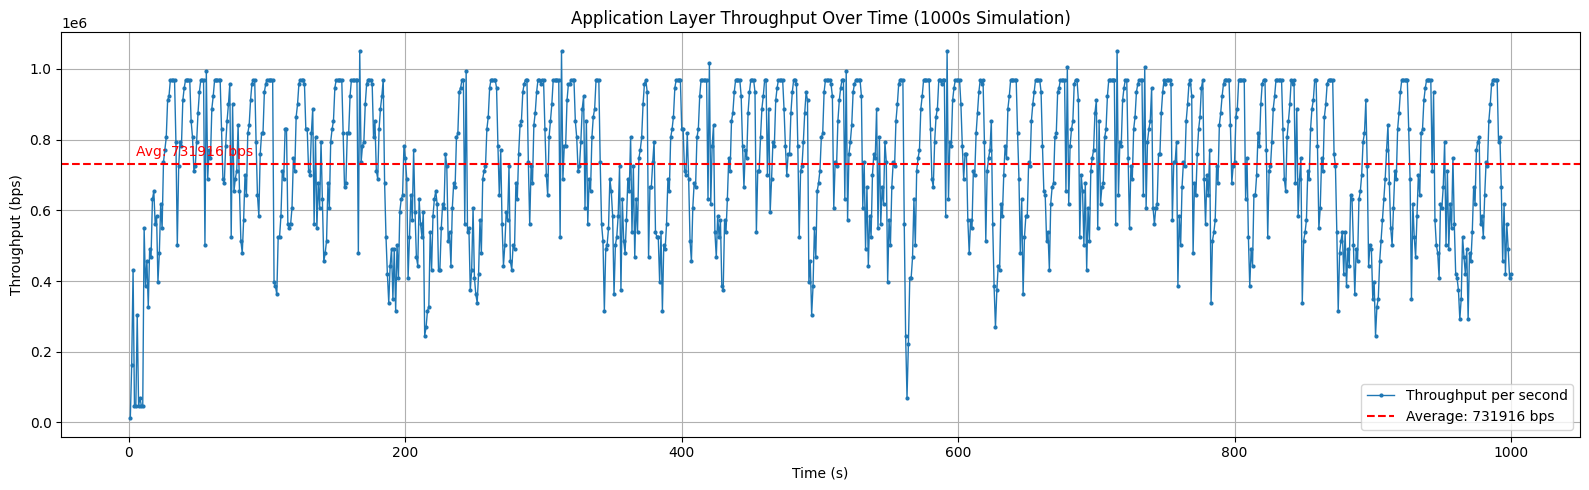

In [26]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/1000s_repeat_5.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 1000 seconds
duration = 1000
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 1000s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(16, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', markersize=2, linewidth=1, label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (1000s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(5, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


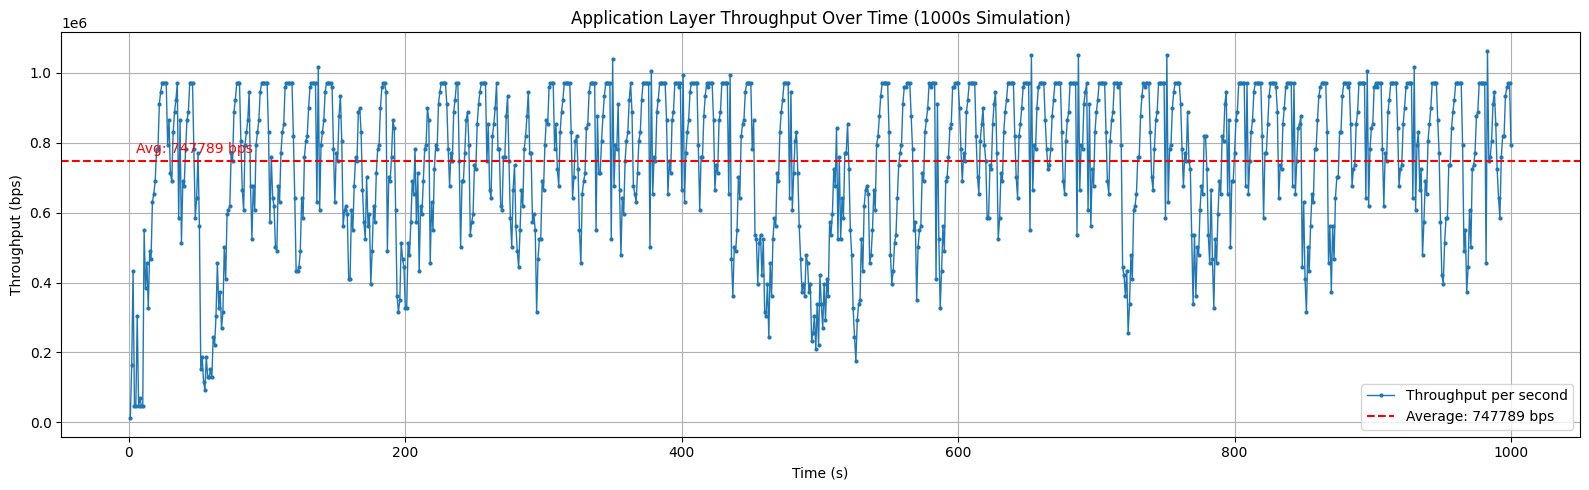

In [27]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/1000s_repeat_6.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 1000 seconds
duration = 1000
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 1000s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(16, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', markersize=2, linewidth=1, label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (1000s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(5, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


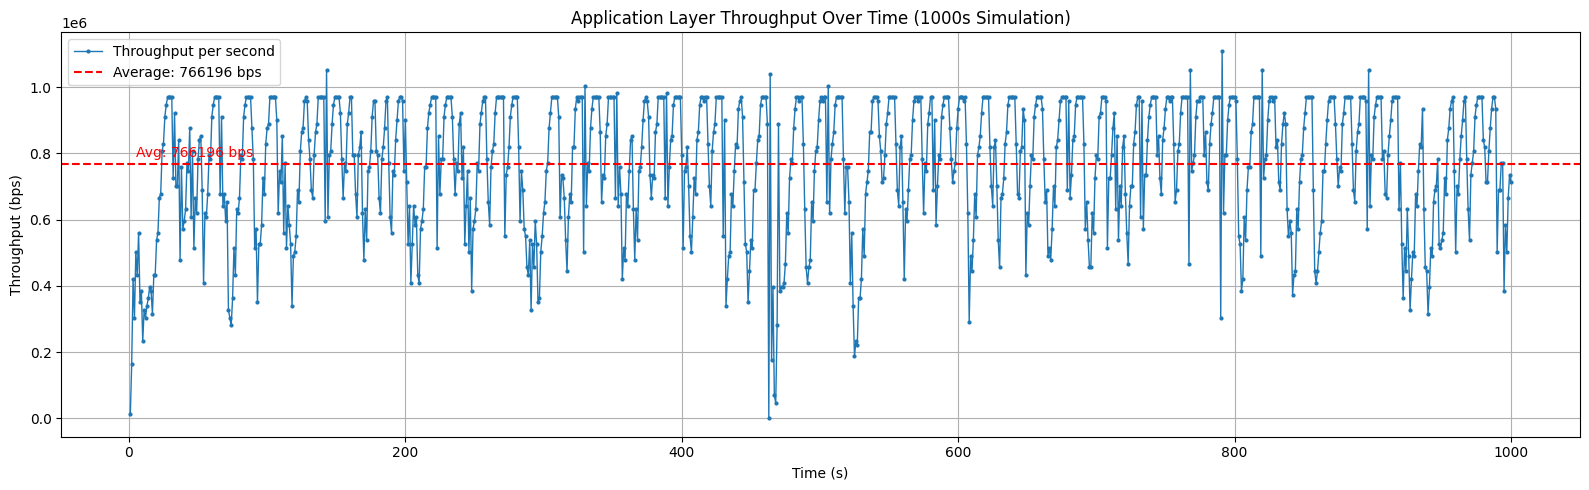

In [28]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/1000s_repeat_7.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 1000 seconds
duration = 1000
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 1000s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(16, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', markersize=2, linewidth=1, label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (1000s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(5, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


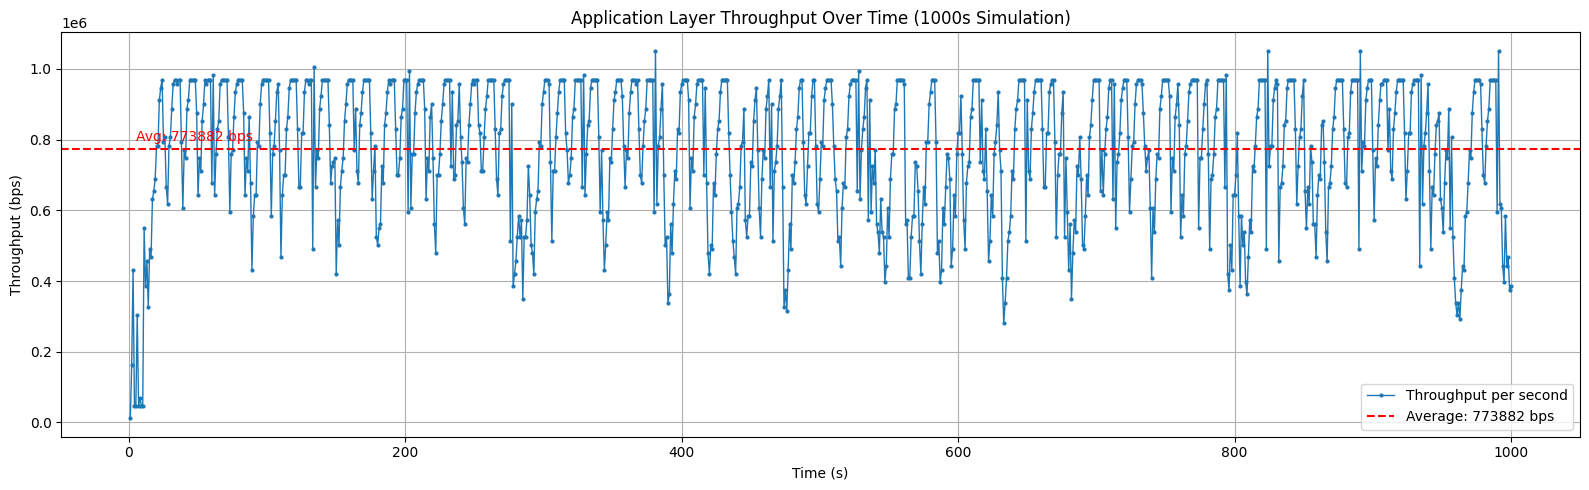

In [29]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/1000s_repeat_8.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 1000 seconds
duration = 1000
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 1000s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(16, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', markersize=2, linewidth=1, label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (1000s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(5, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


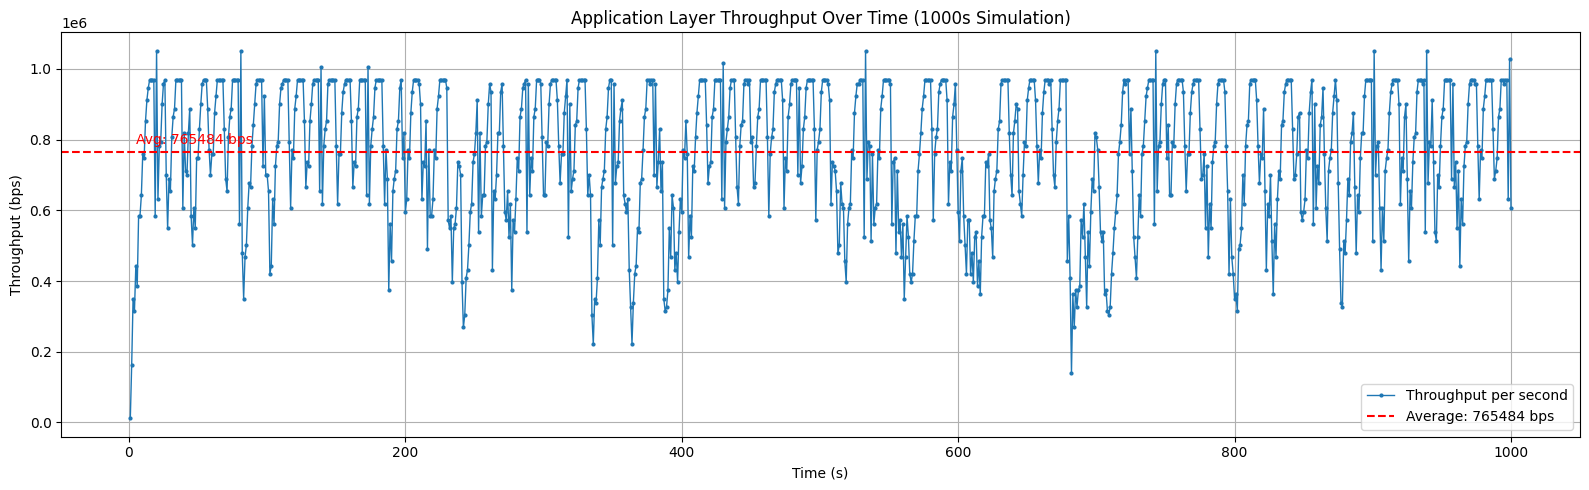

In [30]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file (replace with your actual path)
with open('/content/1000s_repeat_9.json', 'r') as f:
    data = json.load(f)

# Select the first run (adjust if needed)
first_run_key = list(data.keys())[0]
vector = None
for v in data[first_run_key]['vectors']:
    if v['module'] == 'TcpNetwork.server.app[0]' and 'packetReceived' in v['name']:
        vector = v
        break

# Extract times and values
times = np.array(vector['time'])
values = np.array(vector['value'])  # bytes

# Set duration to 1000 seconds
duration = 1000
bin_edges = np.arange(0, duration + 1, 1)
throughput_per_sec = []

# Compute throughput per second (bps)
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    mask = (times >= start) & (times < end)
    total_bytes = values[mask].sum()
    throughput = total_bytes * 8  # bits per second
    throughput_per_sec.append(throughput)

# Compute average throughput over the 1000s (in bps)
total_bytes = values.sum()
average_throughput = (total_bytes * 8) / duration  # bits per second

# Plot throughput curve
plt.figure(figsize=(16, 5))
plt.plot(range(1, duration + 1), throughput_per_sec, marker='o', markersize=2, linewidth=1, label='Throughput per second')
plt.axhline(average_throughput, color='r', linestyle='--', label=f'Average: {average_throughput:.0f} bps')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (bps)')
plt.title('Application Layer Throughput Over Time (1000s Simulation)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate average value on the plot
plt.text(5, average_throughput + max(throughput_per_sec)*0.02, f'Avg: {average_throughput:.0f} bps', color='r')

plt.show()


Confidence Interval 10s repetition 10

In [33]:
import numpy as np
from scipy import stats

# Replace this list with your 10 throughput values in bps
throughputs = [121472, 121472, 121472, 121472, 121472, 121472, 121472, 121472, 121472, 121472]

# Calculate statistics
mean = np.mean(throughputs)
std_dev = np.std(throughputs, ddof=1)  # sample standard deviation
n = len(throughputs)
confidence = 0.95

# t-distribution critical value for 95% CI and n-1 degrees of freedom
t_critical = stats.t.ppf((1 + confidence) / 2, n - 1)

# Margin of error
margin_of_error = t_critical * (std_dev / np.sqrt(n))

# Confidence interval
ci_lower = mean - margin_of_error
ci_upper = mean + margin_of_error

print(f"Mean throughput: {mean:.2f} bps")
print(f"Margin of Error : ±{margin_of_error:.2f} bps (with t-score = {t_critical:.3f})")
print(f"95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}] bps")


Mean throughput: 121472.00 bps
Margin of Error : ±0.00 bps (with t-score = 2.262)
95% Confidence Interval: [121472.00, 121472.00] bps


Confidence Interval 100s repetition 10

In [34]:
import numpy as np
from scipy import stats

# Replace this list with your 10 throughput values in bps
throughputs = [714816, 583766, 618573, 749739, 704187, 711312,670782 , 743782, 716101, 660387]

# Calculate statistics
mean = np.mean(throughputs)
std_dev = np.std(throughputs, ddof=1)  # sample standard deviation
n = len(throughputs)
confidence = 0.95

# t-distribution critical value for 95% CI and n-1 degrees of freedom
t_critical = stats.t.ppf((1 + confidence) / 2, n - 1)

# Margin of error
margin_of_error = t_critical * (std_dev / np.sqrt(n))

# Confidence interval
ci_lower = mean - margin_of_error
ci_upper = mean + margin_of_error

print(f"Mean throughput: {mean:.2f} bps")
print(f"Margin of Error : ±{margin_of_error:.2f} bps (with t-score = {t_critical:.3f})")
print(f"95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}] bps")

Mean throughput: 687344.50 bps
Margin of Error : ±38432.30 bps (with t-score = 2.262)
95% Confidence Interval: [648912.20, 725776.80] bps


Confidence Interval 1000s repetition 10

In [35]:
import numpy as np
from scipy import stats

# Replace this list with your 10 throughput values in bps
throughputs = [765274, 735349, 760006, 767540, 737475, 731916,747789 , 766196, 773882, 765484]

# Calculate statistics
mean = np.mean(throughputs)
std_dev = np.std(throughputs, ddof=1)  # sample standard deviation
n = len(throughputs)
confidence = 0.95

# t-distribution critical value for 95% CI and n-1 degrees of freedom
t_critical = stats.t.ppf((1 + confidence) / 2, n - 1)

# Margin of error
margin_of_error = t_critical * (std_dev / np.sqrt(n))

# Confidence interval
ci_lower = mean - margin_of_error
ci_upper = mean + margin_of_error

print(f"Mean throughput: {mean:.2f} bps")
print(f"Margin of Error : ±{margin_of_error:.2f} bps (with t-score = {t_critical:.3f})")
print(f"95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}] bps")

Mean throughput: 755091.10 bps
Margin of Error : ±11076.45 bps (with t-score = 2.262)
95% Confidence Interval: [744014.65, 766167.55] bps
